In [27]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [28]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [29]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [30]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

3.53463355985906 -133.14871682464127
83.51450234818597 14.311868065840144
69.80694601372247 -56.375020885608535
-18.701855866784157 -123.24210830449884
-68.95044710158382 67.51682795191107
44.13371661019963 -135.8580713725778
70.5197233360208 -36.1852032881022
69.37839053148923 163.5340589409828
51.713543618531276 -152.68778434847698
66.00925587859996 173.23066944541222
-24.836929788044912 -78.21844004956537
81.80999238112764 -47.54014081171931
16.965780810206198 -67.39716425789689
59.352660416866314 -107.87193172120888
86.13728841785672 -156.58395345697872
75.4365194761304 89.47550433102117
8.53497328552075 135.94172405127932
1.260247437984944 -85.72384866655898
-26.398159263825043 -44.47037463767856
-78.10723789181061 88.87170291588598
-47.6593027381534 -154.1272072375885
36.47612509671981 -172.58323754991204
-50.29194279588855 144.45578857048412
-11.561042104332955 -165.31937511651614
46.94076843605288 44.597823059349565
-61.56389268940599 -38.79944935730859
-60.52553098120647 -97.1

58.75957736205848 -172.0969314997056
-2.3883278173088485 155.14302333433648
-25.06960195454336 -51.48242007977649
39.14257915854151 -148.9956396056856
61.937816951178206 138.83579225655353
-34.85952186359913 56.95363748552515
-59.761714057546456 91.33086339269062
-49.69234023299574 45.93597102006299
55.4365693918258 96.96012449129137
65.37941484030137 -74.79039972503232
59.408645184748735 7.967457179880597
27.818790645896186 11.60221337014275
-49.764724278617614 -156.03763681107057
-67.1482393238593 -75.82334063805634
-1.820049639108717 -0.9732138418853253
-11.446851259810813 -124.17032588528008
-60.07149367125227 -87.48787585156244
89.16733292501121 -80.22062225433697
7.264844816115314 153.22029219592417
-4.125955093116119 167.1149195028263
73.09710555950619 114.11533837552656
-72.35775191050774 -72.19180537951647
-55.7955456068409 -147.8731243305606
23.583154495289335 -16.388731535916776
47.5806455452217 -33.15311333889798
29.786180986504775 -12.065168377446298
-57.17017796437857 18.

In [31]:
from citipy import citipy

In [32]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

610

In [33]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [34]:
# Starting URL for Weather Map API Call. Here we have not mentioned the city.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5035b8788ac9fc67c4481f9b2fff21b9


In [35]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | talcahuano
Processing Record 2 of Set 1 | guerrero negro
Processing Record 3 of Set 1 | shelopugino
Processing Record 4 of Set 1 | srednekolymsk
Processing Record 5 of Set 1 | bokspits
City not found. Skipping...
Processing Record 6 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 7 of Set 1 | haukipudas
Processing Record 8 of Set 1 | nanortalik
Processing Record 9 of Set 1 | amderma
City not found. Skipping...
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | castro
Processing Record 12 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 13 of Set 1 | krasnoyarsk-66
City not found. Skipping...
Processing Record 14 of Set 1 | la sarre
Processing Record 15 of Set 1 | san patricio
Processing Record 16 of Set 1 | dikson
Processing Record 17 of Set 1 | khatanga
Processing Record 18 of Set 1 | qaqortoq
Processing Record 19 of Set 1 | hollins
Pro

Processing Record 37 of Set 4 | verkhnevilyuysk
Processing Record 38 of Set 4 | alenquer
Processing Record 39 of Set 4 | verdalsora
City not found. Skipping...
Processing Record 40 of Set 4 | sobolevo
Processing Record 41 of Set 4 | pevek
Processing Record 42 of Set 4 | najran
Processing Record 43 of Set 4 | gat
Processing Record 44 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 45 of Set 4 | falealupo
City not found. Skipping...
Processing Record 46 of Set 4 | namatanai
Processing Record 47 of Set 4 | kiama
Processing Record 48 of Set 4 | longonjo
Processing Record 49 of Set 4 | narrabri
Processing Record 50 of Set 4 | strelka
Processing Record 1 of Set 5 | santiago
Processing Record 2 of Set 5 | vardo
Processing Record 3 of Set 5 | bajil
Processing Record 4 of Set 5 | bubaque
Processing Record 5 of Set 5 | bambous virieux
Processing Record 6 of Set 5 | jiangyou
Processing Record 7 of Set 5 | gayeri
Processing Record 8 of Set 5 | borovskoy
Processing R

Processing Record 28 of Set 8 | santa fe
Processing Record 29 of Set 8 | puerto colombia
Processing Record 30 of Set 8 | adrar
Processing Record 31 of Set 8 | north bend
Processing Record 32 of Set 8 | nelson bay
Processing Record 33 of Set 8 | addi ugri
City not found. Skipping...
Processing Record 34 of Set 8 | korla
Processing Record 35 of Set 8 | santa isabel do rio negro
Processing Record 36 of Set 8 | stepnyak
Processing Record 37 of Set 8 | west bay
Processing Record 38 of Set 8 | djibo
Processing Record 39 of Set 8 | manggar
Processing Record 40 of Set 8 | dzhusaly
City not found. Skipping...
Processing Record 41 of Set 8 | gouyave
Processing Record 42 of Set 8 | aklavik
Processing Record 43 of Set 8 | severodvinsk
Processing Record 44 of Set 8 | melfi
Processing Record 45 of Set 8 | borogontsy
Processing Record 46 of Set 8 | ambulu
Processing Record 47 of Set 8 | ketchikan
Processing Record 48 of Set 8 | estelle
Processing Record 49 of Set 8 | lahaina
Processing Record 50 of S

Processing Record 15 of Set 12 | kyaikto
Processing Record 16 of Set 12 | cidreira
Processing Record 17 of Set 12 | aromashevo
Processing Record 18 of Set 12 | itoman
Processing Record 19 of Set 12 | palasa
Processing Record 20 of Set 12 | calmar
Processing Record 21 of Set 12 | filadelfia
Processing Record 22 of Set 12 | qasigiannguit
Processing Record 23 of Set 12 | launceston
Processing Record 24 of Set 12 | constantine
Processing Record 25 of Set 12 | fredericton
Processing Record 26 of Set 12 | mamou
Processing Record 27 of Set 12 | aneho
Processing Record 28 of Set 12 | kirakira
Processing Record 29 of Set 12 | velykoploske
Processing Record 30 of Set 12 | grande prairie
Processing Record 31 of Set 12 | mitsamiouli
Processing Record 32 of Set 12 | hulyaypole
Processing Record 33 of Set 12 | lapua
Processing Record 34 of Set 12 | new richmond
Processing Record 35 of Set 12 | zarubino
Processing Record 36 of Set 12 | malakal
Processing Record 37 of Set 12 | vostok
Processing Record

In [36]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Talcahuano,-36.7167,-73.1167,55.08,71,40,3.44,CL,2022-06-15 18:41:59
1,Guerrero Negro,27.9769,-114.0611,73.62,51,0,15.12,MX,2022-06-15 18:41:59
2,Shelopugino,51.6514,117.5599,48.99,96,6,1.50,RU,2022-06-15 18:41:59
3,Srednekolymsk,67.4500,153.6833,60.42,37,93,8.84,RU,2022-06-15 18:42:00
4,Haukipudas,65.1765,25.3523,59.05,83,100,14.14,FI,2022-06-15 18:42:00
5,Nanortalik,60.1432,-45.2371,41.20,77,43,8.77,GL,2022-06-15 18:42:00
6,Jamestown,42.0970,-79.2353,89.02,72,100,5.99,US,2022-06-15 18:41:34
7,Castro,-24.7911,-50.0119,65.77,64,83,2.13,BR,2022-06-15 18:42:01
8,La Sarre,48.8002,-79.1996,69.98,80,100,12.71,CA,2022-06-15 18:40:25
9,San Patricio,28.0170,-97.5169,93.07,38,100,19.10,US,2022-06-15 18:42:01


In [37]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [38]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

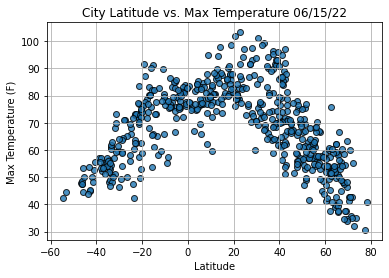

In [39]:
# Import time module
import time


# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

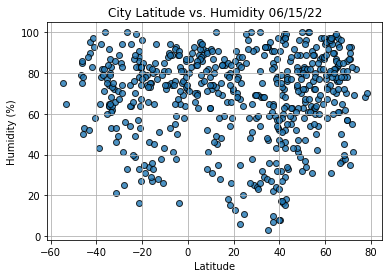

In [40]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

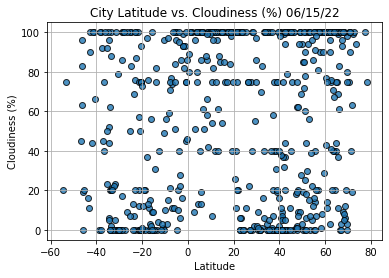

In [41]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

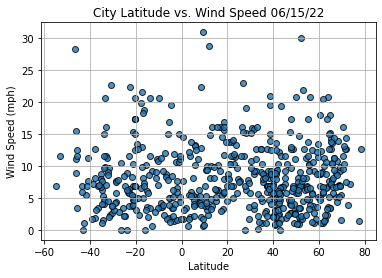

In [42]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [45]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [46]:
index13 = city_data_df.loc[13]
index13

City                      Hollins
Lat                       37.3413
Lng                      -79.9431
Max Temp                    96.35
Humidity                       65
Cloudiness                     20
Wind Speed                   6.91
Country                        US
Date          2022-06-15 18:38:58
Name: 13, dtype: object

In [47]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3       True
4       True
       ...  
559     True
560     True
561     True
562     True
563     True
Name: Lat, Length: 564, dtype: bool

In [48]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Guerrero Negro,27.9769,-114.0611,73.62,51,0,15.12,MX,2022-06-15 18:41:59
2,Shelopugino,51.6514,117.5599,48.99,96,6,1.50,RU,2022-06-15 18:41:59
3,Srednekolymsk,67.4500,153.6833,60.42,37,93,8.84,RU,2022-06-15 18:42:00
4,Haukipudas,65.1765,25.3523,59.05,83,100,14.14,FI,2022-06-15 18:42:00
5,Nanortalik,60.1432,-45.2371,41.20,77,43,8.77,GL,2022-06-15 18:42:00
...,...,...,...,...,...,...,...,...,...
559,Camacha,33.0833,-16.3333,67.42,68,40,16.11,PT,2022-06-15 18:55:57
560,Saint Anthony,45.0205,-93.2180,66.88,88,100,11.50,US,2022-06-15 18:55:57
561,Tibu,8.6390,-72.7358,94.89,41,42,3.87,CO,2022-06-15 18:55:58
562,Chardara,41.2547,67.9692,84.29,27,0,7.99,KZ,2022-06-15 18:55:58


In [49]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Guerrero Negro,27.9769,-114.0611,73.62,51,0,15.12,MX,2022-06-15 18:41:59
2,Shelopugino,51.6514,117.5599,48.99,96,6,1.50,RU,2022-06-15 18:41:59
3,Srednekolymsk,67.4500,153.6833,60.42,37,93,8.84,RU,2022-06-15 18:42:00
4,Haukipudas,65.1765,25.3523,59.05,83,100,14.14,FI,2022-06-15 18:42:00
5,Nanortalik,60.1432,-45.2371,41.20,77,43,8.77,GL,2022-06-15 18:42:00


In [50]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

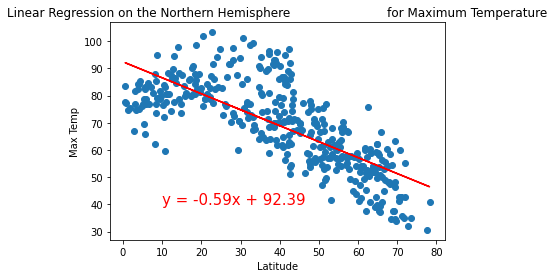

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

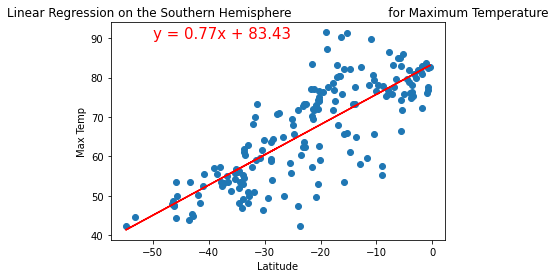

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

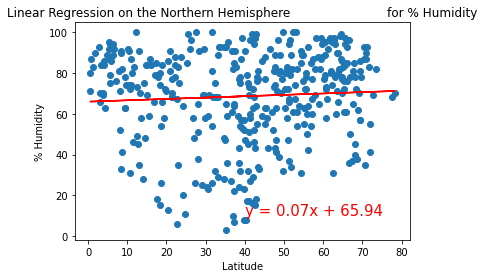

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

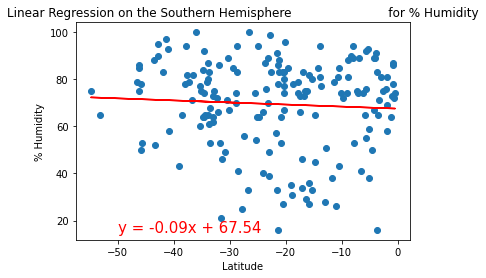

In [57]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

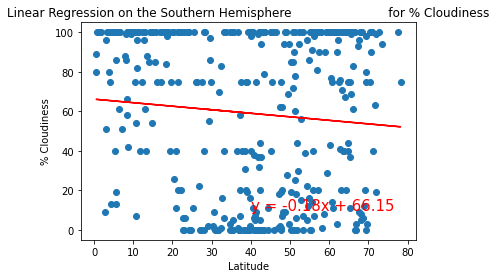

In [64]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

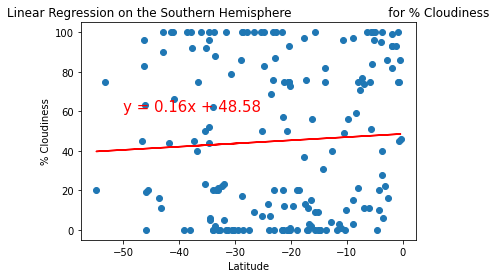

In [66]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

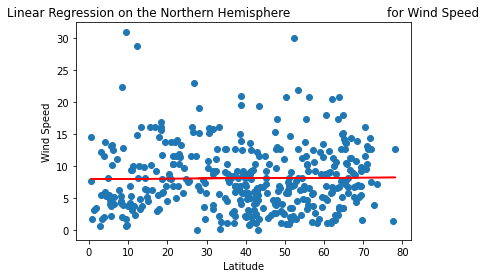

In [67]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

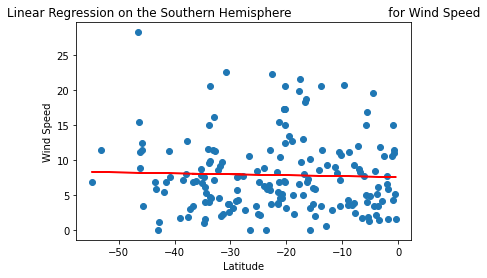

In [68]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))